# Read me

# Import

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker



%matplotlib inline

# Dry Spells

In [3]:
colors = [(0.46812764321414846, 0.3925413302575934, 0.6468281430219147),
         (0.6403690888119955, 0.6059976931949251, 0.7797001153402539),
         (0.7944636678200693, 0.7898500576701271, 0.886966551326413),
         (0.9138023836985776, 0.9173394848135333, 0.9474048442906574),
         (0.9810073048827375, 0.9279507881584006, 0.8536716647443291),
         (0.9946943483275663, 0.8230680507497117, 0.5988465974625145),
         (0.9587081891580161, 0.659284890426759, 0.29711649365628606),
         (0.8438292964244521, 0.47750865051903113, 0.06766628219915417)]

levels=[0.91,0.94,0.97,1.0,1.03,1.06,1.09]
map_projection=ccrs.PlateCarree()

# Reading Weibull model output files

NH_MJJASO = '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/stats/NH_weibull_MJJASO\
_drythresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
NH_NDJFMA = '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/stats/NH_weibull_NDJFMA\
_drythresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
SH_MJJASO = '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/stats/SH_weibull_MJJASO\
_drythresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
SH_NDFMA = '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/stats/SH_weibull_NDJFMA\
_drythresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
dpi=300

files = [NH_MJJASO, NH_NDJFMA, SH_MJJASO, SH_NDFMA]

titles =['MJJASO', 'NDJFMA', 'MJJASO', 'NDJFMA'] 
regions = ['NH', 'NH', 'SH', 'SH']
labels = ['a', 'b', 'c', 'd']


dry1 = xr.open_dataset(files[0]).transpose()
dry2 = xr.open_dataset(files[1]).transpose()
dry3 = xr.open_dataset(files[2]).transpose()
dry4 = xr.open_dataset(files[3]).transpose()

0
1
2
3


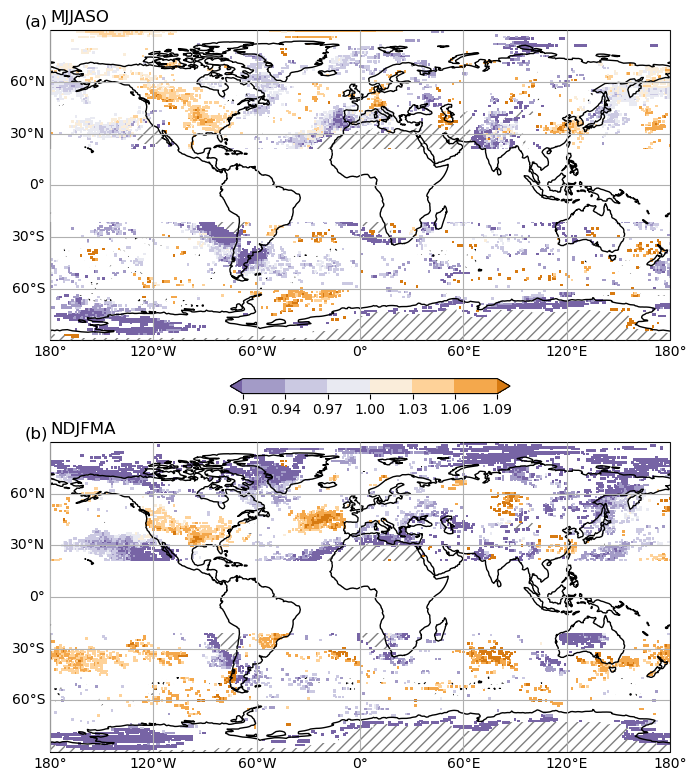

In [5]:
# Plotting
levels=[0.91,0.94,0.97,1.0,1.03,1.06,1.09]

data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]
ds_all = [dry1, dry3, dry2, dry4]
for i in range(0,4):
    
    ds=ds_all[i]
    ax=axes[i]
    print(i)
    nans_da = ds.acf.copy()
    where_nans = np.isnan(nans_da.values)
    nans_da.values[where_nans] = 0.
    nans_da.values[~where_nans] = np.nan
    mpl.rcParams['hatch.color'] = 'grey'
    nans_da.plot.contourf(ax=ax, colors='none', hatches=['///'], 
                    zorder=10, add_colorbar=False,
                         )
    
    

    a=ds.acf.where(ds.pvalue<0.025).plot.pcolormesh(ax=ax, colors=colors, extend='both',
                                    levels=levels,
                                    add_colorbar=False,
                                     transform=data_projection
                                     )
    # plot only if values are present
    if (ds.AD_p<0.01).sum() > 3:
        mpl.rcParams['hatch.color'] = 'black'
        ds.AD_p.where(ds.AD_p < 0.01).plot.contourf(ax=ax,levels=[0, 0.01], 
                                     hatches=['...'], # add/remove dots to control density
                                     colors='none',
                                     add_colorbar=False,
                                     transform=ccrs.PlateCarree()
                                    )
        
    
        
        
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

da_mask = xr.DataArray(np.zeros(shape=(41, 359)), coords={'lat': np.arange(-20,21),
                                                         'lon': np.arange(-179,180)},
                      dims=('lat', 'lon'))



for ax in [ax1, ax2]:
    
    da_mask.plot(ax=ax, color=['white'], add_colorbar=False,
           zorder=100
            )
    ax.coastlines(zorder=101);
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False, zorder=102);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.35, 0.5, 0.35, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax,
                    ticks=levels,label='' ,
                    orientation='horizontal', pad=0.1)

for fig_format in ['.jpg', '.png', '.pdf']:
    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Dry_spell_jont'+fig_format, 
                dpi=800, bbox_inches='tight')


**Note:** Regions in our study domain filtered out from the statistical model analysis are shown with hatches 

# Wet spells

In [2]:
# Reading Weibull model output files
NH_MJJASO = '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/stats/NH_weibull_MJJASO\
_wet_thresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
NH_NDJFMA = '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/stats/NH_weibull_NDJFMA\
_wet_thresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
SH_MJJASO = '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/stats/SH_weibull_MJJASO\
_wet_thresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
SH_NDFMA = '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/stats/SH_weibull_NDJFMA\
_wet_thresh_1_min_spell_count_40_time_steps_min_spell_length_5D_1D_N_1980_2016.nc'
dpi=300

files = [NH_MJJASO, NH_NDJFMA, SH_MJJASO, SH_NDFMA]



wet1 = xr.open_dataset(files[0]).transpose()
wet2 = xr.open_dataset(files[1]).transpose()
wet3 = xr.open_dataset(files[2]).transpose()
wet4 = xr.open_dataset(files[3]).transpose()

0
1
2
3


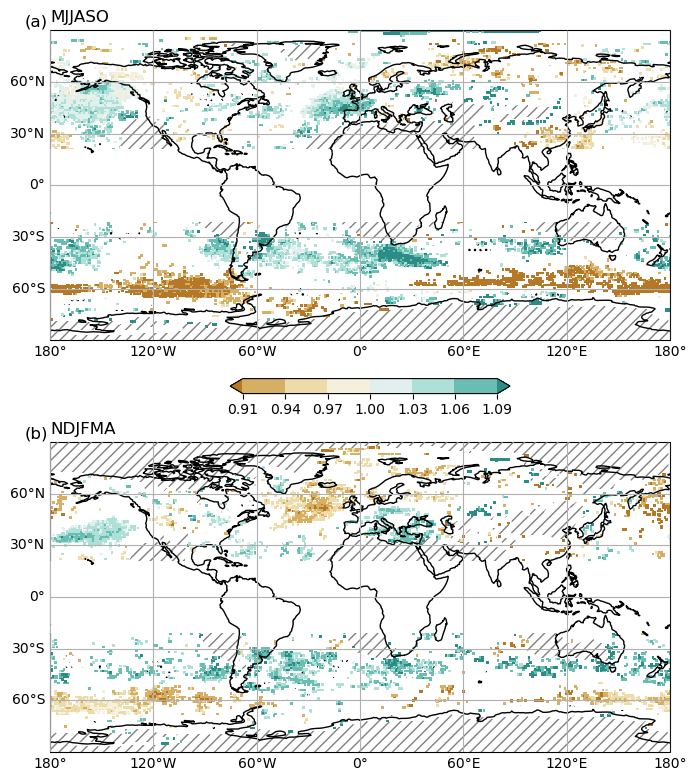

In [3]:
# Plotting
colors = [(0.7098039215686275, 0.46897347174163784, 0.14955786236063054),
 (0.8376009227220299, 0.6858131487889272, 0.39792387543252583),
 (0.9328719723183391, 0.8572087658592848, 0.6678200692041522),
 (0.9625528642829682, 0.9377931564782775, 0.8723567858515955),
 (0.8794309880815072, 0.9413302575932334, 0.932487504805844),
 (0.6821222606689737, 0.8775086505190313, 0.8482122260668975),
 (0.415455594002307, 0.7416378316032297, 0.6991926182237602),
 (0.16785851595540177, 0.554479046520569, 0.5231064975009612),]

levels=[0.91,0.94,0.97,1.0,1.03,1.06,1.09]

data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]
ds_all = [wet1, wet3, wet2, wet4]
for i in range(0,4):
    
    ds=ds_all[i]
    ax=axes[i]
    print(i)
    nans_da = ds.acf.copy()
    where_nans = np.isnan(nans_da.values)
    nans_da.values[where_nans] = 0.
    nans_da.values[~where_nans] = np.nan
    mpl.rcParams['hatch.color'] = 'grey'
    nans_da.plot.contourf(ax=ax, colors='none', hatches=['///'], 
                    zorder=10, add_colorbar=False,
                         )
    
    

    a=ds.acf.where(ds.pvalue<0.025).plot.pcolormesh(ax=ax, colors=colors, extend='both',
                                    levels=levels,
                                    add_colorbar=False,
                                     transform=data_projection
                                     )
    # plot only if values are present
    if (ds.AD_p<0.01).sum() > 3:
        mpl.rcParams['hatch.color'] = 'black'
        ds.AD_p.where(ds.AD_p < 0.01).plot.contourf(ax=ax,levels=[0, 0.01], 
                                     hatches=['...'], # add/remove dots to control density
                                     colors='none',
                                     add_colorbar=False,
                                     transform=ccrs.PlateCarree()
                                    )
        
    
        
        
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

da_mask = xr.DataArray(np.zeros(shape=(41, 359)), coords={'lat': np.arange(-20,21),
                                                         'lon': np.arange(-179,180)},
                      dims=('lat', 'lon'))



for ax in [ax1, ax2]:
    
    da_mask.plot(ax=ax, color=['white'], add_colorbar=False,
           zorder=100
            )
    ax.coastlines(zorder=101);
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False, zorder=102);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.35, 0.5, 0.35, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax,
                    ticks=levels,label='' ,
                    orientation='horizontal', pad=0.1)

for fig_format in ['.jpg', '.png', '.pdf']:
    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Wet_spell_jont'+fig_format, 
                dpi=800, bbox_inches='tight')
